In [14]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


# Random Data

In [19]:
# The random numbers are the same every time the code is run
np.random.seed(0)

# Generator to random points

X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]],cluster_std=0.9)

In [48]:
# 'X' has 2 columns and 'y' has 1. We use the data from X
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [47]:
# Transforming data to DataFrame

randf = pd.DataFrame(data=X)
randf.columns=['X','Y'] 
randf.head()

,X,Y
0,-1.821506,0.070980
1,2.167326,-2.931996
2,0.846516,-3.260753
3,-1.440191,-1.366783
4,4.901198,4.537491


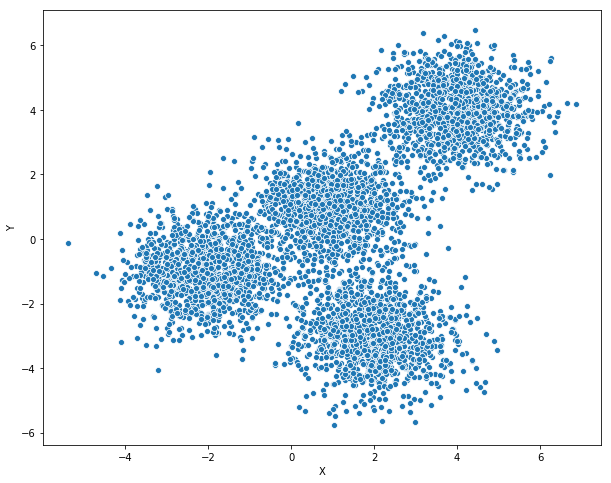

In [49]:
fig = plt.figure(figsize=(10, 8)) #fig size
sns.scatterplot(x=randf['X'], y=randf['Y']) #plot

## Modeling

In [37]:
# Run the model
cluster_num = 4
k_means = KMeans(init='k-means++',n_clusters = cluster_num, n_init = 12)

# Fit the model
k_means.fit(X)

# Get labels 
labels = k_means.labels_  #Cada punto a qué cluster pertenece 0,1 ó 2
labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

In [39]:
# cluster_centers should be the same to the centers list=[4, 4], [-2, -1], [2, -3], [1, 1]

cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Insights

In [50]:
# Add Cluster column

randf['Clus'] = labels
randf.head()

,X,Y,Clus
0,-1.821506,0.070980,0
1,2.167326,-2.931996,3
2,0.846516,-3.260753,3
3,-1.440191,-1.366783,0
4,4.901198,4.537491,1


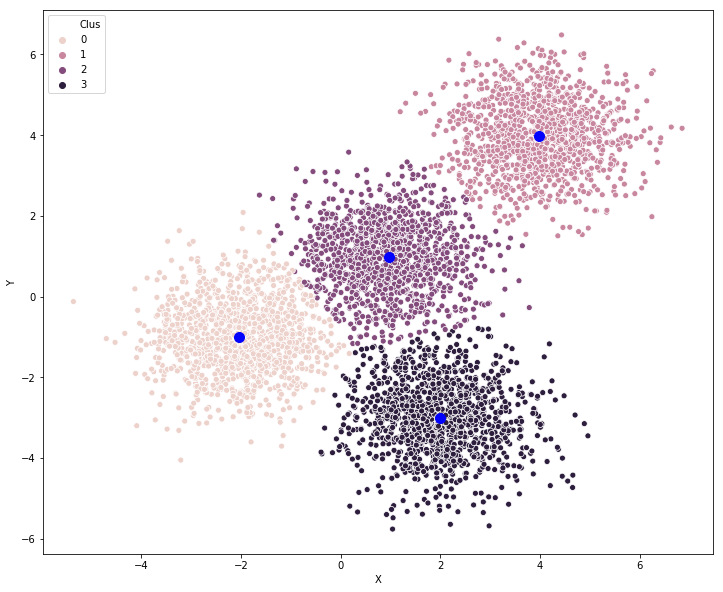

In [62]:
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(x=randf['X'],y=randf['Y'],hue=randf['Clus'])
plt.scatter(x=cluster_centers[:,0],y=cluster_centers[:,1],s=100,c='blue')
plt.show()

# Dataframe: Customer data

## Data set up

In [63]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


In [64]:
customer_df=pd.read_csv('customer_segmentation.csv')
customer_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Pre processing

In [83]:
# Drop feature Address because is a categorical variable
customer_df = customer_df.drop('Address',axis=1)

# Features: X has to be in numpy, so use '.values'
X = customer_df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'Defaulted', 'DebtIncomeRatio']].values

# Replace NaN values with 0
X = np.nan_to_num(X)

# Normalize data: fit_transform is equal to apply fit() + transform()
from sklearn.preprocessing import StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)

Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling

In [84]:
# Run the model
k_means = KMeans(init='k-means++',n_clusters=3,n_init=12)

#Fit the model
k_means.fit(Clus_dataSet)


#Get labels 
labels = k_means.labels_
labels.shape

(850,)

## Insights

In [85]:
# Add Cluster column

customer_df['Clus'] = labels
customer_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [87]:
# Centroides
customer_df.groupby('Clus').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus,,,,,,,,,
0,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


In [97]:
customer_df.groupby('Clus').count()['Customer Id'].to_frame()

,Customer Id
Clus,
0,537
1,147
2,166


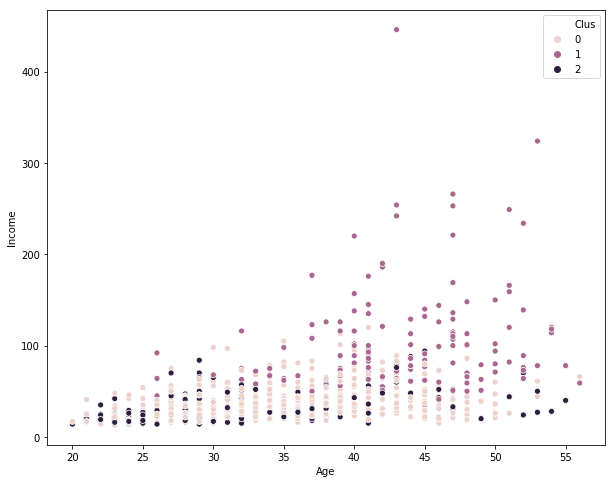

In [102]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y="Income", hue="Clus", data=customer_df)